# Exercise 3: Image Addition and Approximation



**Date**: Wednesday, November 22, 11:15am

<br>

## Our Mission
In this exercise, our focus is on working with images, providing an example of how to employ approximate computing for image manipulation. More specifically, we aim to perform both exact and approximate additions of two grayscale images. The objective is to observe the differences in the resulting images based on the level of approximation.

<br>

### Loading required packages packages

In [15]:
from skimage import io, img_as_float, img_as_ubyte
from scipy import signal
from math import log10
import matplotlib.pyplot as plt
import numpy as np

<br>

### Subtask 1: Display Input Images as Grayscale
First laod the first example image and convert it to grayscale. Note the formula that is used here to calculate the luminance or grayscale value of a color in the RGB color space. The coefficients 0.299, 0.587, and 0.114 are weights assigned to each color channel, and they are based on the perceived brightness of each color to the human eye. For more on this see https://en.wikipedia.org/wiki/CIELAB_color_space

(672, 570, 3)
(672, 570)


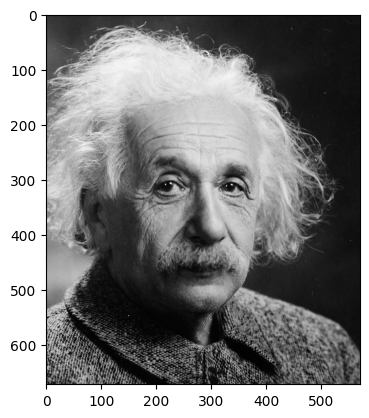

In [16]:
einstein_img = io.imread("Einstein.jpg")
print(einstein_img.shape)

R_1 = einstein_img[:, :, 0] 
G_1 = einstein_img[:, :, 1]
B_1 = einstein_img[:, :, 2]

#formula for converting colour(RGB) to Gray Image scale Image
Y_einstein = (0.299 * np.array(R_1)) + (0.587 * np.array(G_1)) + (0.114 * np.array(B_1)) 

plt.imshow(Y_einstein , cmap = "gray")
print(Y_einstein.shape)

(672, 570)


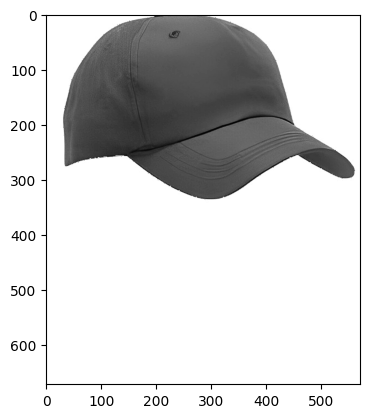

In [17]:
img_cap = io.imread("cap.jpg")
R_2 = img_cap[:, :, 0] 
G_2 = img_cap[:, :, 1]
B_2 = img_cap[:, :, 2]

#formula for converting colour(RGB) to Gray Image scale Image
Y_cap = (0.299 * np.array(R_2)) + (0.587 * np.array(G_2)) + (0.114 * np.array(B_2)) 

plt.imshow(Y_cap , cmap = "gray")
print(Y_cap.shape)

#

### Subtask 2: Exact Addition of Images
How do you think you can add the grayscale images together? We will simply add the value of the pixels together and do this once accurately and once approximately

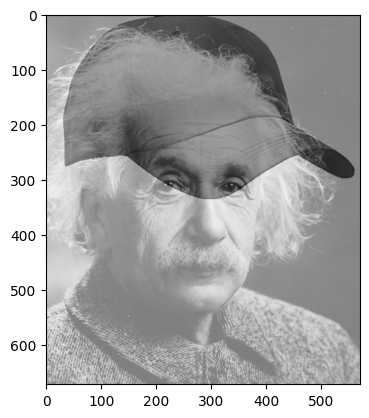

In [18]:
Y_einstein=np.array(Y_einstein)
Y_cap=np.array(Y_cap)

add = Y_einstein + Y_cap

plt.imshow(add, cmap = "gray")

In [19]:
print(Y_einstein.shape)
print(Y_cap.shape)

(672, 570)
(672, 570)


<br>

### Subtask 3: Approximate Addition
In this Subtask we want to take the binary addition to the next step and build on top of an exact/approximate binary addition a NBit-Adder that can not only perform addition of any decimal number but also control the level of approximation


### Exact Adder Function
The ExactAdder function performs binary addition on three input bits (a, b, and c). It outputs the sum (s) and carry-out (c_out) based on the combination of input bits. The function encapsulates the logic of a full adder, handling all possible input cases through conditional statements. It is a fundamental component in digital circuit design.

In [20]:
def ExactAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=0
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=1
        c_out=1
    return s, c_out

<br>

### Approximate Adder Function
The ApproxAdder function attempts binary addition but deviates from conventional logic in its handling of input combinations. In particular, it provides an inaccurate sum (s) for the cases (0, 0, 0) and (1, 1, 1).

Failure Cases:

#### Input (0, 0, 0):
Incorrect sum (s) = 1
Correct carry-out (c_out) = 0

#### Input (1, 1, 1):
Incorrect sum (s) = 0
Correct carry-out (c_out) = 1

#### Considerations:
The function's approach to binary addition may have specific intentions, but users should be cautious about its accuracy, especially in scenarios requiring precise binary addition.

#### Function Usage:
Call the function with three binary inputs (a, b, and c) to obtain the potentially inaccurate sum (s) and correct carry-out (c_out).

In [21]:
# Sum logic fails for input combinations (0, 0, 0) and (1, 1, 1) 
def ApproxAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=1
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=0
        c_out=1
    return s, c_out

<br>

### N-bit Adder Function

The `MyNbitAdder` function is designed to perform N-bit addition, where the lower 4 bits utilize an approximate adder (`ApproxAdder`), and the remaining bits employ an exact adder (`ExactAdder`).

#### Function Overview

1. **Input Conversion:**
   - Convert input integers `a` and `b` to binary and remove the binary prefix.

2. **Byte Reversal:**
   - Reverse the order of bits in both binary representations.

3. **Equalizing Byte Length:**
   - Ensure both binary representations have equal length by padding with zeros.

4. **Bitwise Addition:**
   - Perform bitwise addition, using either the approximate adder or exact adder based on the specified threshold (`approx_until`).

5. **Result Calculation:**
   - Calculate the total sum by summing up the bitwise results and accounting for any carry-over.

This function allows users to perform N-bit addition with a customizable threshold (`approx_until`) to switch between the approximate and exact adders. Adjust the threshold as needed for specific requirements.

In [22]:
#In 8 bit adder, lower 3 bits are implemented with approximate adder and rest of the with exact adder
def MyNbitAdder(a,b, approx):
    #convert to binary and cut off the first two indices (they dont belong to the number but indicate that it is binary)
    a_bin, b_bin = bin(a)[2:] , bin(b)[2:]
    
    #reverse order of bytes for the adder
    rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
    
    
    #We want to make the to bytes to equalt length such that we can add 
    #--> add zeros to the shortest list until it is the same as the longest
    rev_a = rev_a + max(0, len(rev_b)-len(rev_a)) * [0]
    rev_b = rev_b + max(0, len(rev_a)-len(rev_b)) * [0]
    
    
    carry_over  = 0
    total_sum   = 0
    
    #############################################
    approx_until = approx #change this if u want to approximate the first bits by an approximate adder
    #############################################

    #we want to do a bitwise addition
    count = 0
    for index, (bit1, bit2) in enumerate( zip(rev_a, rev_b) ):
        if index < approx_until:
            #use approx_adder
            sum_element, carry_over = ApproxAdder(int(bit1), int(bit2), int(carry_over) ) 
            count = count + 1
        else:
            #use exact_adder
            sum_element, carry_over = ExactAdder(int(bit1), int(bit2), int(carry_over) )
            count = count + 1
        total_sum += pow(2,index)*sum_element

    total_sum += pow(2,index+1)*carry_over
    return total_sum, count

print(MyNbitAdder(512,512))


(1027, 10)


<br>

### Image Adder Function

The `MyAdder` function is designed to add two images represented as arrays (`f` and `g`). It utilizes a custom N-bit adder (`MyNbitAdder`) for element-wise addition of corresponding pixel values.

#### Function Overview

1. **Input Conversion:**
   - Convert input images `f` and `g` to NumPy arrays and ensure they are of integer type.

2. **Image Size Validation:**
   - Ensure that the size of both images is the same.

3. **Pixel-wise Addition:**
   - Iterate through each pixel of the images and use the custom N-bit adder (`MyNbitAdder`) to add corresponding pixel values.

4. **Resultant Image:**
   - Return the resultant image as a NumPy array.

This function allows users to add two images pixel-wise using the custom N-bit adder. Ensure that the images have the same size for proper element-wise addition. Adjust the input images as needed for specific use cases.

In [23]:
# Function that addes two images
max_Nbit_adder = np.zeros(Y_einstein.shape) ## maximum bit of adders required to add two decimal values
def MyAdder(f,g, approx):
    f=np.array(f).astype(int)
    g=np.array(g).astype(int)
    #ensure that the size of the image is the same    
    res = np.zeros(f.shape)    
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):         
            #we will use a custom adding function
            res[i, j], max_Nbit_adder[i, j] = MyNbitAdder(f[i,j],g[i,j],approx)
    return res, max_Nbit_adder

<br>

### Subtask 4: Display added image and Measuring Metrics
Lets see the result of our adder and compare it to the original

8.0
255.0
255.0


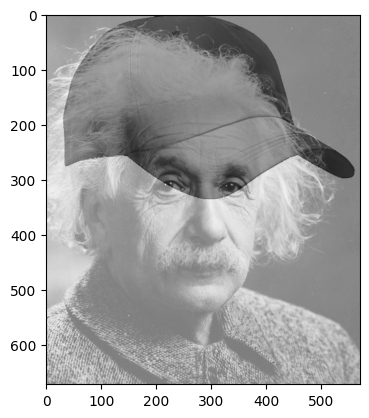

In [24]:
add_approx,max_Nbit_adder = MyAdder(Y_einstein,Y_cap)
plt.imshow(add_approx, cmap = "gray")
print(max_Nbit_adder.max())
print(Y_einstein.max())
print(Y_cap.max())

### Similarity Index
The Structural Similarity Index measures the structural similarity between two images and returns a value between -1 and 1. A value of 1 indicates perfect similarity, while a value of -1 indicates complete dissimilarity. The result provides insight into how well the structure of one image matches the structure of another.

In [25]:
from skimage.metrics import structural_similarity as ssim
data_range=add.max() - add_approx.max()  
ssi = ssim(add, add_approx, data_range=data_range)
print(ssi)

0.9464934936241276


### Maximum Error Distance:
The `max_error_distance` represents the maximum absolute difference between pixel values of two images (`add` and `add_approx`). It provides a measure of the maximum error in intensity or color between corresponding pixels in the two images.

### Mean Squared Error (MSE):
The `mse` (Mean Squared Error) is a measure of the average squared difference between corresponding pixel values of two images (`add` and `add_approx`). It quantifies the overall magnitude of the error and is commonly used to evaluate the quality of image reconstructions. A lower MSE indicates a smaller difference between the images.

### Peak Signal-to-Noise Ratio (PSNR):
The `psnr` (Peak Signal-to-Noise Ratio) is a metric that evaluates the quality of an image by comparing it to a reference image. It is particularly useful in image compression and reconstruction. A higher PSNR indicates lower perceptual loss and better image quality. The formula involves the maximum possible pixel value (`add.max()`), the MSE, and a logarithmic scaling. PSNR is often expressed in decibels (dB).

In summary, these metrics help assess the similarity and quality of two images. `max_error_distance` gives the maximum absolute difference, while `mse` and `psnr` provide quantitative measures of overall error and image quality, respectively.


In [26]:
max_error_distance = (add-add_approx).max()  ### maximum error distance between two images
print(max_error_distance)
mse = np.mean((add - add_approx)**2)         ### MSE should be closed to zreo
print(mse)
psnr = 10 * log10((add.max()**2) /mse)       ### PSNR should be closer to 54 dB
print(psnr)

3.9919999999999902
1.7163466046391949
51.80535356980346


8.0
255.0
255.0
3.9919999999999902
1.7163466046391949
51.80535356980346


NameError: name 'i' is not defined

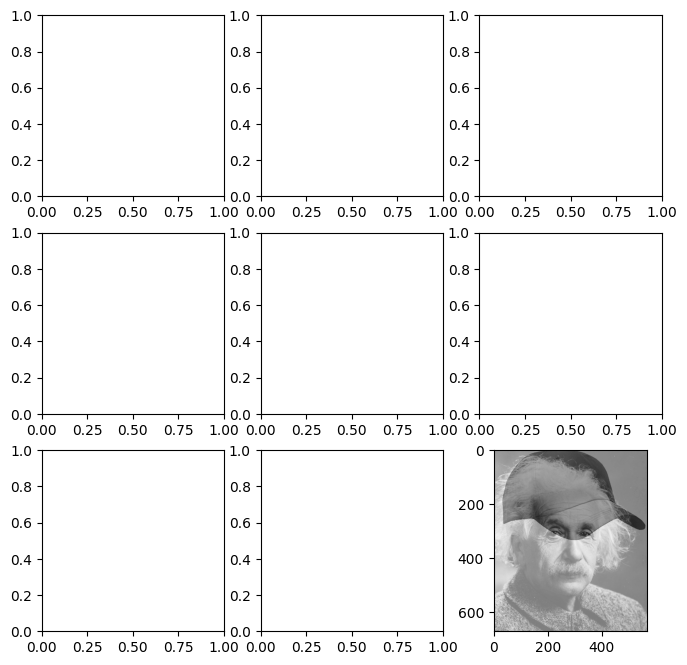

In [27]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for approx in range(0,9):
    add_approx,max_Nbit_adder = MyAdder(Y_einstein,Y_cap)
    plt.imshow(add_approx, cmap = "gray")
    print(max_Nbit_adder.max())
    print(Y_einstein.max())
    print(Y_cap.max())
    max_error_distance = (add-add_approx).max()  ### maximum error distance between two images
    print(max_error_distance)
    mse = np.mean((add - add_approx)**2)         ### MSE should be closed to zreo
    print(mse)
    psnr = 10 * log10((add.max()**2) /mse)       ### PSNR should be closer to 54 dB
    print(psnr)

    # Check if there are more images than subplots
    image_data=np.average(add_approx,axis=-1)
    if i < len(image_data):
        ax.imshow(image_data)  # Plot the image
        ax.set_title(f'Approximate Multiplier {i}')  # Set a title for the subplot
    else:
        ax.axis('off')  # Turn off the empty subplots if there are fewer images

# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Display the plot
plt.show()